In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

In [265]:
#Load path to the data file on mortality datae
path = r"\\MortalityTable_SmokervsNon_Smoker.xlsx"
df = pd.read_excel(path)

<Axes: title={'center': 'Hazard Rate by Type \n Based on CSO 2017 Mortality Table'}>

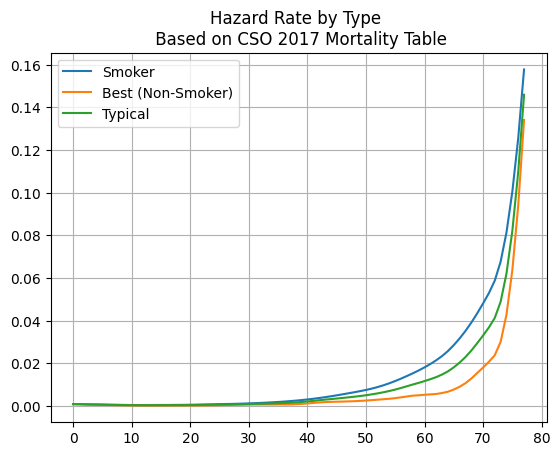

In [266]:
df.plot(grid =True, y =['Smoker', 'Best (Non-Smoker)', 'Typical'], title ="Hazard Rate by Type \n Based on CSO 2017 Mortality Table")

In [267]:
import math

for group in ['Smoker', 'Best (Non-Smoker)', 'Typical']:
    
    df['Sv-'+group] = df[group].cumsum().apply(lambda x: math.exp(-x))
    df['Sv-change-'+group] = df['Sv-'+group].diff(1)
    
    print (group)


Smoker
Best (Non-Smoker)
Typical


<Axes: title={'center': 'Survival Probability'}>

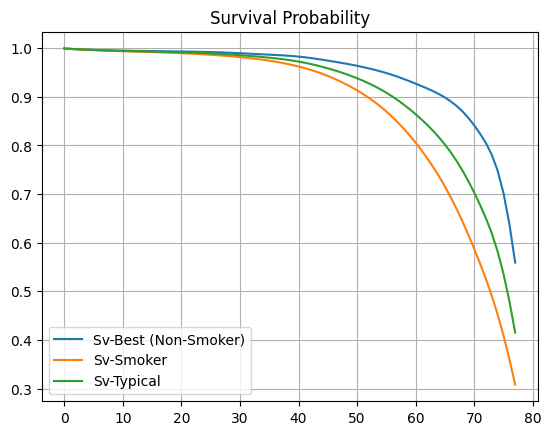

In [268]:
df.plot(grid = True, y=['Sv-'+'Best (Non-Smoker)', 'Sv-Smoker', 'Sv-Typical'], title ='Survival Probability')

The relationship between life insurance amount $C$ and premium is:
$$P = \frac{\sum_{i=1}^n\left(Sv(t_{i-1})- Sv(t_i)\right)e^{-rt_i}}{\sum_{i=1}^n (Sv(t_i)- Sv(T))e^{-rt_i}} C \tag{1}$$

In [184]:
df = df.dropna()
df.index = df['Agen'].values

df

,Agen,Smoker,Best (Non-Smoker),Typical,Sv-Smoker,Sv-change-Smoker,Sv-Best (Non-Smoker),Sv-change-Best (Non-Smoker),Sv-Typical,Sv-change-Typical,prem-80
19,19,0.00076,0.00077,0.000765,0.998441,-0.000759,0.998401,-0.000769,0.998421,-0.000764,0.011231
20,20,0.00073,0.00066,0.000695,0.997713,-0.000729,0.997743,-0.000659,0.997728,-0.000694,0.011678
21,21,0.00067,0.00056,0.000615,0.997044,-0.000668,0.997184,-0.000559,0.997114,-0.000613,0.012145
22,22,0.00062,0.00053,0.000575,0.996426,-0.000618,0.996656,-0.000528,0.996541,-0.000573,0.012634
23,23,0.00057,0.00045,0.000510,0.995859,-0.000568,0.996207,-0.000448,0.996033,-0.000508,0.013148
...,...,...,...,...,...,...,...,...,...,...,...
91,91,0.06765,0.03001,0.048830,0.490932,-0.034361,0.780930,-0.023791,0.619180,-0.030985,0.000000
92,92,0.08136,0.04279,0.062075,0.452571,-0.038361,0.748219,-0.032711,0.581913,-0.037267,0.000000
93,93,0.10053,0.06368,0.082105,0.409286,-0.043285,0.702057,-0.046161,0.536043,-0.045869,0.000000
94,94,0.12546,0.09388,0.109670,0.361028,-0.048259,0.639148,-0.062910,0.480365,-0.055679,0.000000


In [203]:
df.loc[df.Agen == 94]['Sv-Smoker'].values[0]

0.36102791383352545

In [257]:
from IPython.core.debugger import set_trace

# Compute the premium for a basic life insurance with death benefit $1, starts at time start, ends at time end, 
#give interest rate rate

#Face value or death benefit is $1000
def prem(rate, start, end):
    
    temp1 =0
    temp2=0
    
    for i in range (start, end):

        dist = math.exp(-rate*i)

        
        temp1 = temp1 +(df.loc[df.Agen == i]['Sv-Smoker'].values[0] - df['Sv-Smoker'].iloc[(end-96)])*dist
        temp2 = temp2 +-(df.loc[df.Agen == i]['Sv-change-Smoker'].values[0])*dist
        
    if temp1 ==0:
        
        premium = None
        
        #print( 'Start is ', start, 'temp1 is:', temp1, 'temp2 is: ', temp2, )
    
    else:
        
        premium = temp2/temp1
        #print("i is ", i, 'Start is ', start, 'temp1 is:', temp1, 'temp2 is: ', temp2, 'premium is: ', temp2/temp1)
        #set_trace()
        
        premium = premium *1000.00
    
    return premium


In [260]:
prem(0.03,70, 95)

46.23763368571405

In [261]:
df['prem-95']= df['Agen'].apply(lambda x: prem(rate, x, 95))

df['prem-80']= df['Agen'].apply(lambda x: prem(rate, x,80 ))

df['prem-70']= df['Agen'].apply(lambda x: prem(rate, x, 70))

<Axes: >

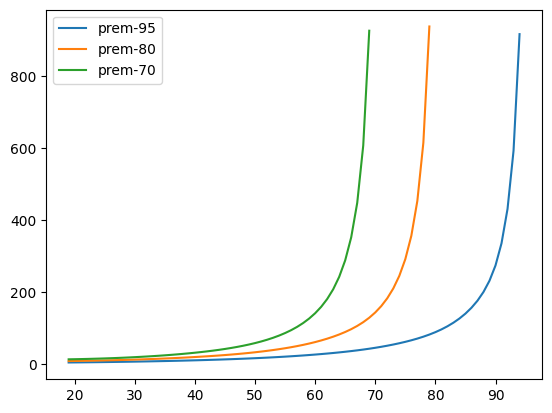

In [256]:
df.plot(y=['prem-95','prem-80','prem-70'])